# Task

Predict whether person has chronic kidney disease(ckd) or no chronic kidney disease(notckd)?

## Preparing Data for Analysis and Modelling

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df=pd.read_csv(r'F:\PRACTICE\Kidney Diseases/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


##### Renaming column names to make it more user-friendly

In [109]:
columns=pd.read_csv('F:\PRACTICE\Kidney Diseases/data_description.txt', sep='-')#reading the data dictionary 
columns=columns.reset_index()
columns

,index,1. Features:
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [110]:
columns.columns=['cols', 'abb_col_names']
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [111]:
df.columns=columns['abb_col_names'].values
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [112]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

As it can be seen red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type. We 
need to change to numerical dtype.

In [113]:
features=['packed cell volume', 'white blood cell count', 'red blood cell count']

In [114]:
def convert_dtype(df, feature):
    df[feature]=pd.to_numeric(df[feature], errors='coerce')

In [115]:
for feature in features:
    convert_dtype(df, feature)

In [116]:
df.drop('id', axis=1, inplace=True) 

'Id' column seems to be an unique identifier for each row, drop it for it does not help us to find any insights from the data.

## Cleaning the data

#### Extract Numerical & Categorical Features

In [117]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object'] #categorical variables
    num_col=[col for col in df.columns if df[col].dtype!='object'] #numeric variables
    return cat_col, num_col

In [118]:
cat_col, num_col=extract_cat_num(df)

In [119]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [120]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

Checking for dirtiness

In [121]:
for col in cat_col:
    print('{} has {} values'.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




Two correct features needed and the target variable which contain certain discrepancy in some values.

In [122]:
#Replace incorrect values
df['diabetes mellitus'].replace(to_replace={'\tno':'no', '\tyes':'yes'}, inplace=True)
df['coronary artery disease']=df['coronary artery disease'].replace(to_replace='\tno', value='no')
df['class']=df['class'].replace(to_replace='ckd\t', value='ckd')

In [123]:
for col in cat_col:
    print('{} has {} values'.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




## Analysing Distributions of the Data

#### Distribution of each numerical column

In [124]:
len(num_col)

14

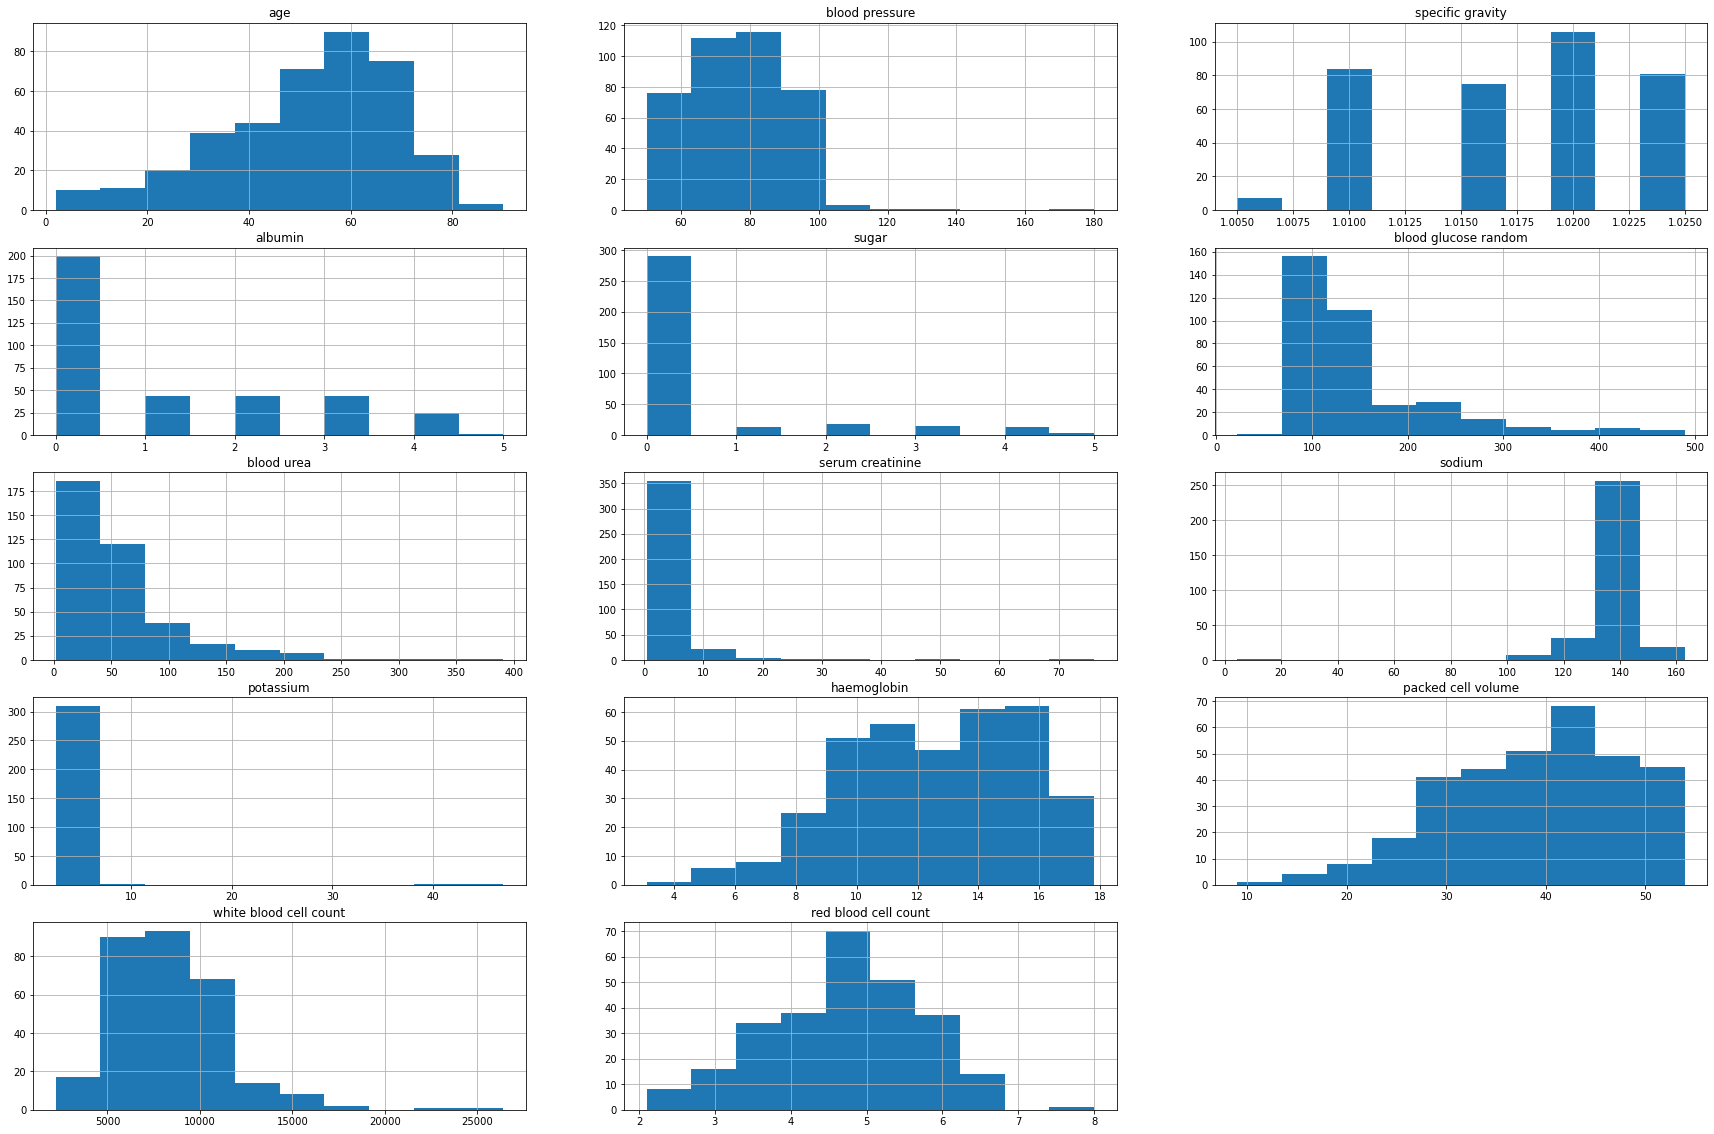

In [125]:
plt.figure(figsize=(30, 20))

for i, feature in enumerate(num_col):
    plt.subplot(5, 3, i+1)
    df[feature].hist()
    plt.title(feature)

#### Observations:
    1.Age looks a bit left skewed
    2.Blood glucose is right skewed
    3.Blood Urea is also a bit right skewed
    4.Rest of the features are lightly skewed

### Label distribution of each categorical column

In [126]:
len(cat_col)

11

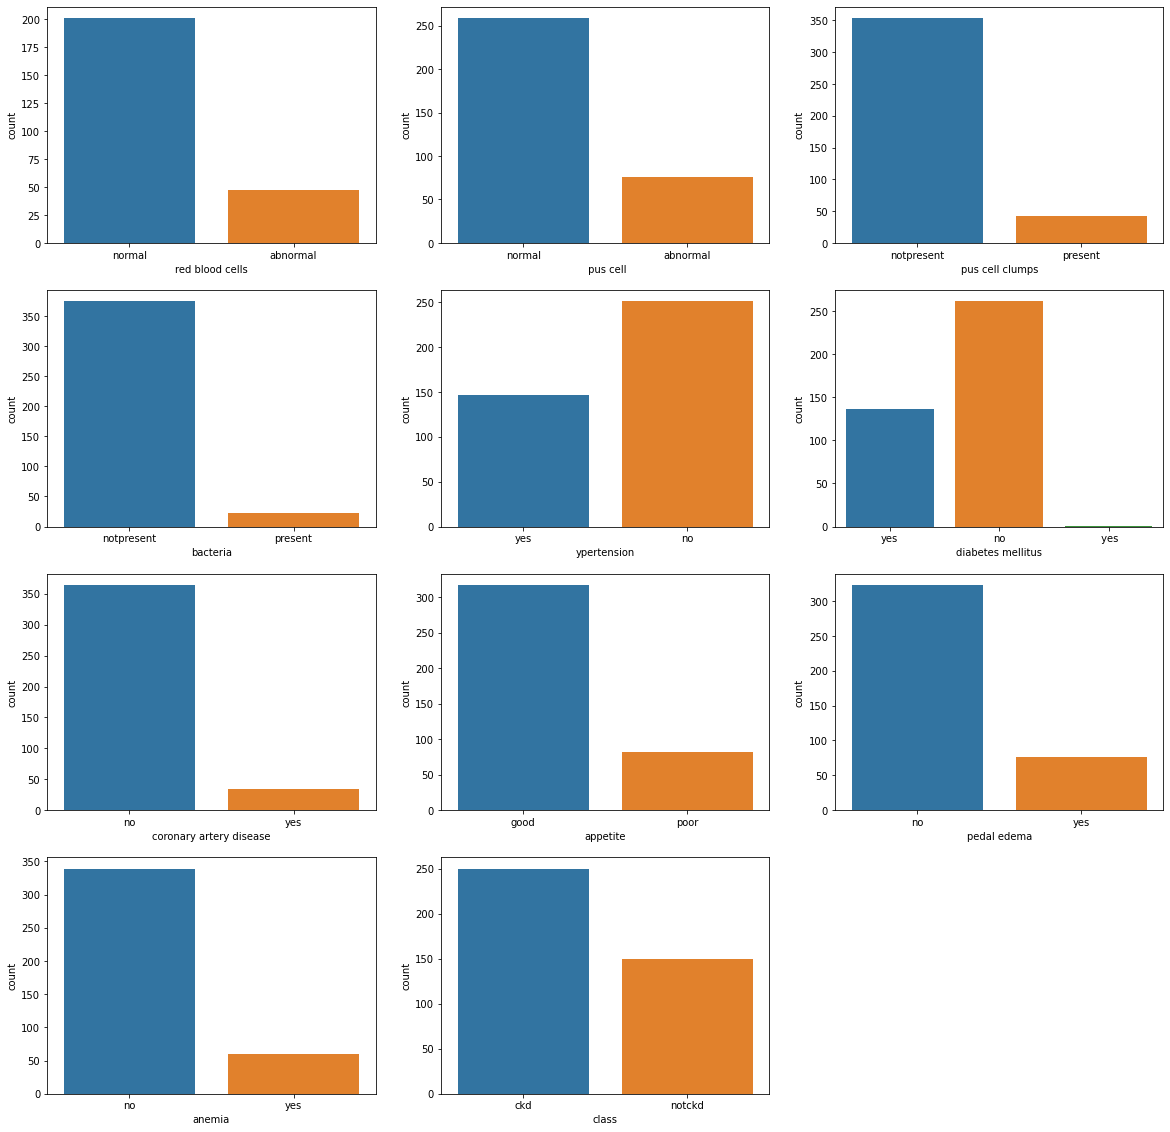

In [127]:
plt.figure(figsize=(20, 20))

for i, feature in enumerate(cat_col):
    plt.subplot(4, 3, i+1)
    sns.countplot(df[feature])

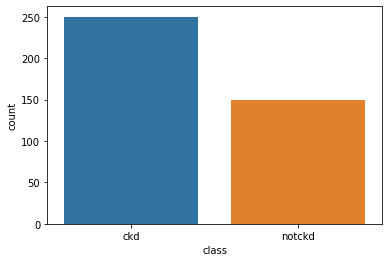

In [128]:
sns.countplot(df['class'])

### Co-relation in the data

#### How columns are co-related to each other and its impact on target features

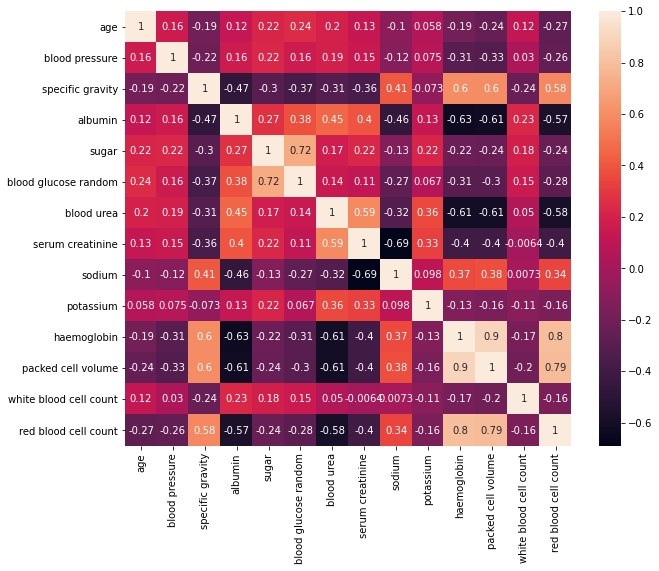

In [129]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

    Positive Correlation:
    
    Specific gravity -> Red blood cell count, Packed cell volume and Haemoglobin
    Sugar -> Blood glucose random
    Blood Urea -> Serum creatinine
    Haemoglobin -> Red Blood cell count <- packed cell volume
    
    Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin
    Serum creatinine -> Sodium

In [130]:
df.groupby(['red blood cells', 'class'])['red blood cell count'].agg(['count', 'mean', 'median', 'min'
                                                                      , 'max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [131]:
import plotly.express as px
px.violin(df, y='red blood cell count', x='class', color='class')

### Relationship between hemoglobin and packed cell volume

In [132]:
px.scatter(df, x='haemoglobin', y='packed cell volume')

### Distribution of 'red_blood_cell_count' chronic and nonchronic 

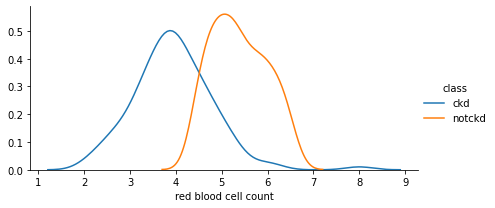

In [133]:
grid=sns.FacetGrid(df, hue='class', aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

### Automate Analysis

In [134]:
def violin(col):
    fig=px.violin(df, y=col, x='class', color='class', box=True)
    return fig.show()

In [135]:
def scatters(col1, col2):
    fig=px.scatter(df, x=col1, y=col2, color='class')
    return fig.show()

In [136]:
def kdeplot(feature):
    grid=sns.FacetGrid(df, hue='class', aspect=2)
    grid.map(sns.kdeplot, 'red blood cell count')
    grid.add_legend()

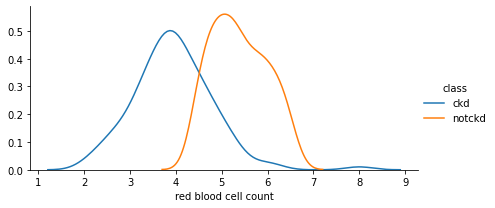

In [137]:
kdeplot('red blood cell count')

### Exploratory data analysis on the data

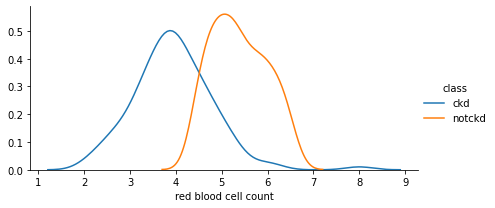

In [138]:
kdeplot('red blood cell count')

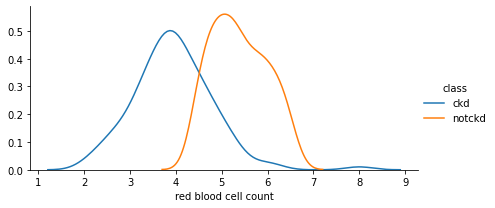

In [139]:
kdeplot('hemoglobin')

In [140]:
scatters('packed cell volume', 'haemoglobin')

In [141]:
violin('red blood cell count')

In [142]:
violin('packed cell volume')

In [143]:
scatters('red blood cell count', 'albumin')

### Handling missing values in the data

In [144]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

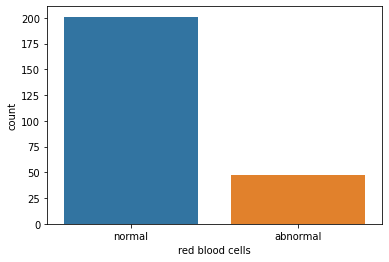

In [145]:
sns.countplot(df['red blood cells'])

In [146]:
data=df.copy()

In [147]:
data['red blood cells'].dropna().sample() #random value produced 

141    normal
Name: red blood cells, dtype: object

In [148]:
data['red blood cells'].isnull().sum()

152

In [149]:
random_sample=data['red blood cells'].dropna().sample(152)
random_sample

331      normal
234    abnormal
397      normal
204      normal
334      normal
         ...   
314      normal
107      normal
9      abnormal
127      normal
330      normal
Name: red blood cells, Length: 152, dtype: object

In [150]:
data[data['red blood cells'].isnull()].index #indexes in respect of missing entries

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [151]:
random_sample.index

Int64Index([331, 234, 397, 204, 334, 344,  34, 255, 357,  36,
            ...
            320, 145, 364, 389,  49, 314, 107,   9, 127, 330],
           dtype='int64', length=152)

In [152]:
random_sample.index=data[data['red blood cells'].isnull()].index
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [153]:
random_sample

0        normal
1      abnormal
5        normal
6        normal
10       normal
         ...   
309      normal
322      normal
349    abnormal
350      normal
381      normal
Name: red blood cells, Length: 152, dtype: object

In [154]:
data.loc[data['red blood cells'].isnull(), 'red blood cells']=random_sample
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [155]:
data['red blood cells'].isnull().sum()

0

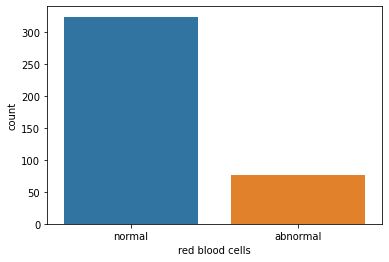

In [156]:
sns.countplot(data['red blood cells'])

In [157]:
def Random_Value_Imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature]=random_sample 

### Cleaning missing values using Random Value Imputation

In [158]:
data[num_col].isnull().sum().sort_values(ascending=False)

red blood cell count      131
white blood cell count    106
potassium                  88
sodium                     87
packed cell volume         71
haemoglobin                52
sugar                      49
specific gravity           47
albumin                    46
blood glucose random       44
blood urea                 19
serum creatinine           17
blood pressure             12
age                         9
dtype: int64

In [159]:
for col in num_col:
    Random_Value_Imputation(col)

In [160]:
data[num_col].isnull().sum().sort_values(ascending=False)

red blood cell count      0
white blood cell count    0
packed cell volume        0
haemoglobin               0
potassium                 0
sodium                    0
serum creatinine          0
blood urea                0
blood glucose random      0
sugar                     0
albumin                   0
specific gravity          0
blood pressure            0
age                       0
dtype: int64

In [161]:
data[cat_col].isnull().sum().sort_values(ascending=False)

 pus cell                  65
bacteria                    4
pus cell clumps             4
coronary artery disease     2
diabetes mellitus           2
ypertension                 2
anemia                      1
pedal edema                 1
appetite                    1
class                       0
red blood cells             0
dtype: int64

In [162]:
Random_Value_Imputation(' pus cell')

In [163]:
data[cat_col].isnull().sum().sort_values(ascending=False)

bacteria                   4
pus cell clumps            4
coronary artery disease    2
diabetes mellitus          2
ypertension                2
anemia                     1
pedal edema                1
appetite                   1
class                      0
 pus cell                  0
red blood cells            0
dtype: int64

In [164]:
data['pus cell clumps'].mode()[0]

'notpresent'

In [165]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [166]:
for col in cat_col:
    impute_mode(col)

In [167]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [168]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,210.0,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,6.5,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


### Applying feature encoding on the data

In [169]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


#### Label Encoding

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
le=LabelEncoder()

In [172]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [173]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,210.0,...,38.0,6000.0,5.2,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,6.5,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


### Selecting best features for the model

In [174]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [175]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [176]:
x=data[ind_col]
y=data[dep_col]

In [177]:
x.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,210.0,...,11.3,38.0,6000.0,5.2,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,6.5,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [178]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [179]:
ordered_rank_features=SelectKBest(score_func=chi2, k=20)
ordered_feature=ordered_rank_features.fit(x, y)

In [180]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x00000273D0652CA0>)

In [181]:
ordered_feature.scores_

array([9.97965051e+01, 8.56983920e+01, 5.56752418e-03, 2.16990840e+02,
       1.02893773e+02, 9.24773663e+00, 1.20891005e+01, 2.52000000e+01,
       1.32000000e+01, 2.36223275e+03, 2.30443240e+03, 3.65626932e+02,
       3.18442565e+01, 2.78503003e+00, 1.23507925e+02, 3.09000145e+02,
       1.32849926e+04, 1.75593334e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [182]:
datascores=pd.DataFrame(ordered_feature.scores_, columns=['Score'])

In [183]:
datascores

,Score
0,99.796505
1,85.698392
2,0.005568
3,216.990840
4,102.893773
5,9.247737
6,12.089101
7,25.200000
8,13.200000
9,2362.232751


In [184]:
dfcols=pd.DataFrame(x.columns)
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [185]:
features_rank=pd.concat([dfcols, datascores], axis=1)
features_rank 

,0,Score
0,age,99.796505
1,blood pressure,85.698392
2,specific gravity,0.005568
3,albumin,216.990840
4,sugar,102.893773
5,red blood cells,9.247737
6,pus cell,12.089101
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2362.232751


In [186]:
features_rank.columns=['features', 'Score']
features_rank 

,features,Score
0,age,99.796505
1,blood pressure,85.698392
2,specific gravity,0.005568
3,albumin,216.990840
4,sugar,102.893773
5,red blood cells,9.247737
6,pus cell,12.089101
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2362.232751


In [187]:
selected_columns=features_rank.nlargest(10, 'Score')['features'].values

In [188]:
selected_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'sugar', 'age', 'ypertension'], dtype=object)

In [189]:
x_new=data[selected_columns]

In [190]:
x_new.head()

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,sugar,age,ypertension
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,0.0,48.0,1
1,6000.0,210.0,18.0,0.8,38.0,4.0,11.3,0.0,7.0,0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,3.0,62.0,0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,0.0,48.0,1
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,0.0,51.0,0


In [191]:
len(x_new)

400

In [192]:
x_new.shape

(400, 10)

### Model Building

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y, train_size=0.75)

In [194]:
print(X_test.shape)
print(X_train.shape)

(100, 10)
(300, 10)


In [195]:
#check whether dataset is imbalance or not
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

#### Finding best model using Hyperparameter Optimization

In [196]:
!pip install xgboost

In [197]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

#### Hyper Parameter Optimization with respect to XGBoost

In [198]:
params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [199]:
from sklearn.model_selection import RandomizedSearchCV

In [200]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [201]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [202]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',
                                 n_jobs=-1,cv=5,verbose=3)

In [203]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[17:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.4s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [204]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [205]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [206]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

#This model is on the basis of cross validation & hyper-parameter optimization

In [207]:
classifier.fit(X_train,y_train)

[17:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [208]:
y_pred=classifier.predict(X_test)

In [209]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [210]:
confusion=confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[60  2]
 [ 1 37]]


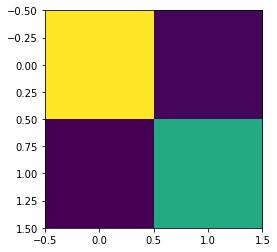

In [211]:
#confusion matrix in a more user-friendly output
plt.imshow(confusion)

In [212]:
accuracy_score(y_test, y_pred)

0.97